In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data=pd.read_csv("train.csv")

In [4]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [7]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
train_data['child']=[1 if x<18 else 0 for x in train_data['Age']]


In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
train_data[['child','Survived']].groupby(['child']).mean()

,Survived
child,
0,0.361183
1,0.539823


/home/kousik/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kousik/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


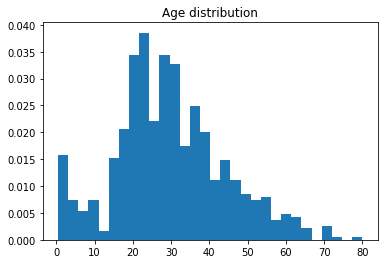

In [11]:
plt.hist(train_data['Age'],density=True,bins=30)
plt.title("Age distribution")
plt.show()

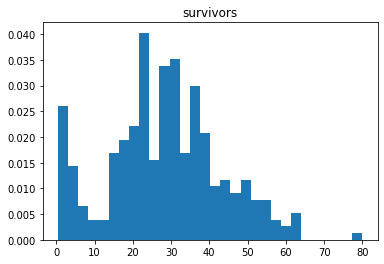

In [12]:
plt.hist(train_data[train_data['Survived']==1]['Age'],density=True,bins=30)
plt.title("survivors")
plt.show()

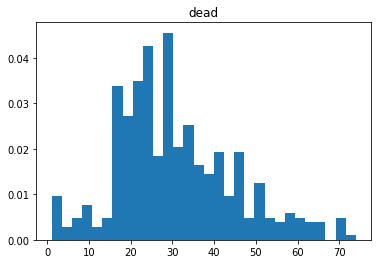

In [13]:
plt.hist(train_data[train_data['Survived']==0]['Age'],density=True,bins=30)
plt.title("dead")
plt.show()

In [14]:
test_data=pd.read_csv('test.csv')

In [15]:
train_data=train_data.drop(['PassengerId','Name','Ticket','Cabin','Embarked','child'],axis=1)
test_data=test_data.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

In [16]:
train_data['Family']=train_data['SibSp']+train_data['Parch']
test_data['Family']=test_data['SibSp']+test_data['Parch']

In [17]:
train_data=train_data.drop(['SibSp','Parch'],axis=1)
test_data=test_data.drop(['SibSp','Parch'],axis=1)

In [18]:
train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [19]:
train_data['age'] = pd.cut(train_data['Age'], [0, 5, 18,30,45,55,75,100], labels=[0,1,2,3,4,5,6])
test_data['age'] = pd.cut(test_data['Age'], [0, 5, 18,30,45,55,75,100], labels=[0,1,2,3,4,5,6])

In [39]:
train_data['fare'] = pd.cut(train_data['Fare'], [0, 10, 18,40,60,90,180,1000], labels=[0,1,2,3,4,5,6])
test_data['fare'] = pd.cut(test_data['Fare'], [0, 10, 18,40,60,90,180,1000], labels=[0,1,2,3,4,5,6])

KeyError: 'Fare'

In [21]:
train_data=train_data.drop(['Age','Fare'],axis=1)
test_data=test_data.drop(['Age','Fare'],axis=1)

In [22]:
train_data.head()

,Survived,Pclass,Sex,Family,age,fare
0,0,3,0,1,2,0
1,1,1,1,1,3,4
2,1,3,1,0,2,0
3,1,1,1,1,3,3
4,0,3,0,0,3,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]

In [42]:
X_train['age']=X_train['age'].fillna(2)
X_train['fare']=X_train['fare'].fillna(0)

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/home/kousik/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.91

In [44]:
svc = SVC()
svc.fit(X_train, Y_train)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


/home/kousik/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.83

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.3

In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.22

In [47]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.54

In [48]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.54

In [50]:
X_train.head()

,Pclass,Sex,Family,age,fare
0,3,0,1,2,0
1,1,1,1,3,4
2,3,1,0,2,0
3,1,1,1,3,3
4,3,0,0,3,0


In [51]:
test_data['age']=test_data['age'].fillna(2)
test_data['fare']=test_data['fare'].fillna(0)
test_data['Survived']=random_forest.predict(test_data.drop("PassengerId",axis=1))

In [53]:
result=test_data[["PassengerId","Survived"]]

In [55]:
export_csv = result.to_csv ('submission.csv', index = None, header=True)